# Bathymetry

This notebook demonstrates loading and plotting bathymetry using xarray and matplotlib.

We require some of the post-processed data. Copy the data from the post-processing folder to the data folder, e.g.
```
cp /path/to/LeConte_postprocessing/proc/bathy*.nc /path/to/LeConte_examples/data/
```
editing the paths as appropriate for your system.

You also need to have installed the `lcexamples` conda environment and kernel (see instructions in the README).


In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Load the netcdf data.

In [2]:
b18 = xr.open_dataset("../data/bathy_sep_2018.nc")
b17 = xr.open_dataset("../data/bathy_sep_2017.nc")
b16 = xr.open_dataset("../data/bathy_aug_2016.nc")

Side by side comparison.

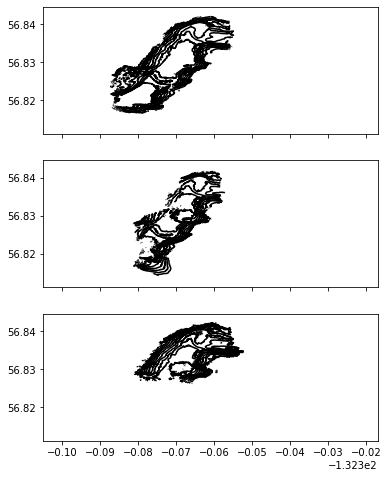

In [3]:
clevs = np.linspace(0, 300, 16)

fig, axs = plt.subplots(3, 1, figsize=(6, 8), sharex=True, sharey=True)
axs[0].contour(b18.lon, b18.lat, b18.H, clevs, colors="k")
axs[1].contour(b17.lon, b17.lat, b17.H, clevs, colors="k")
axs[2].contour(b16.lon, b16.lat, b16.H, clevs, colors="k")

for ax in axs:
    ax.set_aspect("equal")

On top comparison using cartopy mapping.

Text(0.25, 0.7, 'Aug 2016')

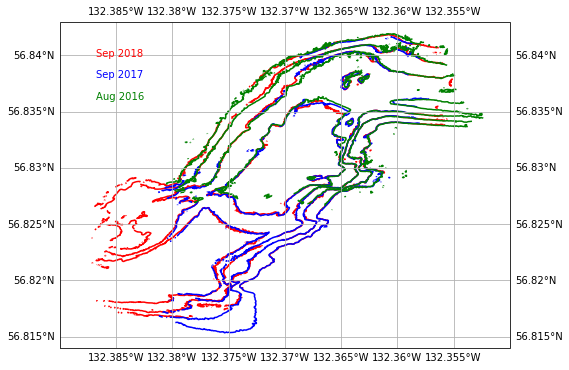

In [4]:
proj = ccrs.PlateCarree()
clevs = np.linspace(0, 300, 7)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection=proj)
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
ax.set_extent((-132.39, -132.35, 56.814, 56.843))
ax.contour(b18.lon, b18.lat, b18.H, clevs, colors="r")
ax.contour(b17.lon, b17.lat, b17.H, clevs, colors="b")
ax.contour(b16.lon, b16.lat, b16.H, clevs, colors="g")
fig.text(0.25, 0.8, "Sep 2018", color="r")
fig.text(0.25, 0.75, "Sep 2017", color="b")
fig.text(0.25, 0.7, "Aug 2016", color="g")